In [52]:
import pandas as pd

In [53]:
articles = pd.read_json('my_guardian_articles.json')
articles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2000 non-null   object
 1   type                2000 non-null   object
 2   sectionId           2000 non-null   object
 3   sectionName         2000 non-null   object
 4   webPublicationDate  2000 non-null   object
 5   webTitle            2000 non-null   object
 6   webUrl              2000 non-null   object
 7   apiUrl              2000 non-null   object
 8   fields              2000 non-null   object
 9   tags                2000 non-null   object
 10  isHosted            2000 non-null   bool  
 11  pillarId            1980 non-null   object
 12  pillarName          1980 non-null   object
dtypes: bool(1), object(12)
memory usage: 205.1+ KB


In [54]:
articles.head()

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,fields,tags,isHosted,pillarId,pillarName
0,technology/2023/oct/31/educators-teachers-ai-l...,article,technology,Technology,2023-10-31T10:00:39Z,‘Is this an appropriate use of AI or not?’: te...,https://www.theguardian.com/technology/2023/oc...,https://content.guardianapis.com/technology/20...,"{'byline': 'Johana Bhuiyan', 'body': '<p>In <a...","[{'id': 'technology/technology', 'type': 'keyw...",False,pillar/news,News
1,technology/ng-interactive/2023/oct/25/a-day-in...,interactive,technology,Technology,2023-10-25T13:38:11Z,A day in the life of AI,https://www.theguardian.com/technology/ng-inte...,https://content.guardianapis.com/technology/ng...,{'byline': 'Hannah Devlin Science Corresponden...,"[{'id': 'technology/artificialintelligenceai',...",False,pillar/news,News
2,technology/2023/oct/24/alphabet-q3-earnings-go...,article,technology,Technology,2023-10-24T22:07:37Z,Google Cloud revenue misses expectations despi...,https://www.theguardian.com/technology/2023/oc...,https://content.guardianapis.com/technology/20...,"{'byline': 'Kari Paul', 'body': '<p>Google is ...","[{'id': 'technology/alphabet', 'type': 'keywor...",False,pillar/news,News
3,stage/2023/sep/19/anthropology-review-hampstea...,article,stage,Stage,2023-09-19T12:02:55Z,Anthropology review – clever AI missing-person...,https://www.theguardian.com/stage/2023/sep/19/...,https://content.guardianapis.com/stage/2023/se...,"{'byline': 'Mark Lawson', 'body': '<p>While sc...","[{'id': 'stage/stage', 'type': 'keyword', 'sec...",False,pillar/arts,Arts
4,film/2023/aug/20/tim-review-clunky-ai-paranoia...,article,film,Film,2023-08-20T10:30:44Z,TIM review – clunky AI paranoia thriller,https://www.theguardian.com/film/2023/aug/20/t...,https://content.guardianapis.com/film/2023/aug...,"{'byline': 'Wendy Ide', 'body': '<p>This styli...","[{'id': 'film/thriller', 'type': 'keyword', 's...",False,pillar/arts,Arts


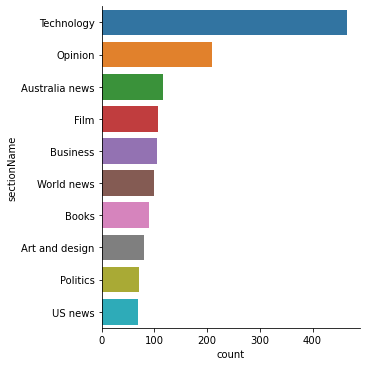

In [82]:
import seaborn as sns

order = articles['sectionName'].value_counts().index[:10]

sns.catplot(data=articles, y='sectionName', kind='count', order=order)

In [83]:
articles['webPublicationDate'] = pd.to_datetime(articles['webPublicationDate'])

In [84]:
import matplotlib.pyplot as plt

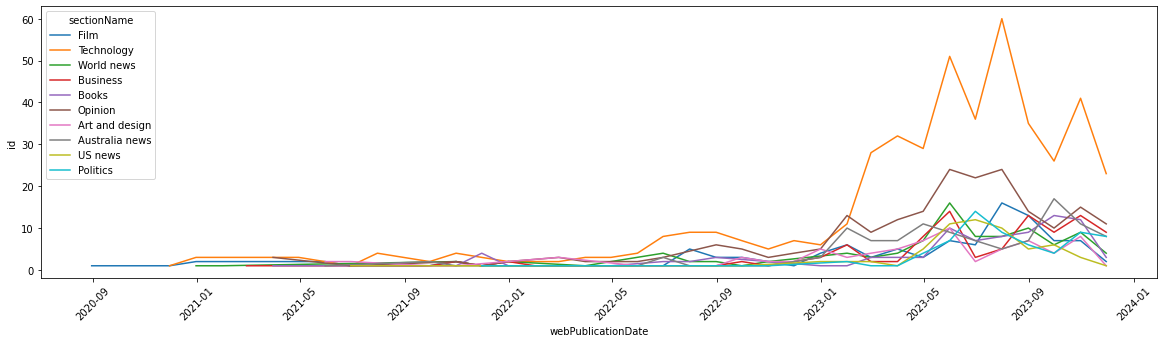

In [85]:
top_sections = articles[articles['sectionName'].isin(order)]
time_grouper = pd.Grouper(key='webPublicationDate', freq='M')
date_counts = top_sections.groupby([time_grouper,'sectionName']).count().reset_index()


plt.figure(figsize=(20,5))
plot = sns.lineplot(data=date_counts, x='webPublicationDate', y='id', hue='sectionName')

plot.tick_params(axis='x', labelrotation=45)

In [11]:
pd.DataFrame(articles['fields'].to_dict())

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
body,"<p>“Another year of living, loving and laughin...","<figure class=""element element-image element--...",<p>We are shocked to read about the critical s...,"<figure class=""element element-image element--...",<p>The growing popularity of two crime fiction...,<p>I would describe myself as a fan of JK Rowl...,<p>Social media platforms allowing teenagers t...,<p>There are almost enough moments of low-leve...,<p>Police chiefs have suggested the home secre...,"<figure class=""element element-image element--...",...,<p>Amid growing outrage over the death of a Je...,<p>The government closed down its investigatio...,<p>Whodunnit? He did it.</p> <p>Donald Trump –...,"<p>Adam Kinzinger, one of two Republicans on t...",<p><br>Paul Schrader is back with another vari...,<p>The Labour party has been urged to take adv...,<p>The leading Indigenous academic Prof Marcia...,<p>The police watchdog has announced an invest...,<p>A US supreme court decision on Wednesday th...,"<p>The mother of Mia Schem, a 21-year-old Fren..."


In [35]:
articles

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,fields,tags,isHosted,pillarId,pillarName
0,technology/2023/oct/31/educators-teachers-ai-l...,article,technology,Technology,2023-10-31 10:00:39+00:00,‘Is this an appropriate use of AI or not?’: te...,https://www.theguardian.com/technology/2023/oc...,https://content.guardianapis.com/technology/20...,"{'byline': 'Johana Bhuiyan', 'body': '<p>In <a...","[{'id': 'technology/technology', 'type': 'keyw...",False,pillar/news,News
1,technology/ng-interactive/2023/oct/25/a-day-in...,interactive,technology,Technology,2023-10-25 13:38:11+00:00,A day in the life of AI,https://www.theguardian.com/technology/ng-inte...,https://content.guardianapis.com/technology/ng...,{'byline': 'Hannah Devlin Science Corresponden...,"[{'id': 'technology/artificialintelligenceai',...",False,pillar/news,News
2,technology/2023/oct/24/alphabet-q3-earnings-go...,article,technology,Technology,2023-10-24 22:07:37+00:00,Google Cloud revenue misses expectations despi...,https://www.theguardian.com/technology/2023/oc...,https://content.guardianapis.com/technology/20...,"{'byline': 'Kari Paul', 'body': '<p>Google is ...","[{'id': 'technology/alphabet', 'type': 'keywor...",False,pillar/news,News
3,stage/2023/sep/19/anthropology-review-hampstea...,article,stage,Stage,2023-09-19 12:02:55+00:00,Anthropology review – clever AI missing-person...,https://www.theguardian.com/stage/2023/sep/19/...,https://content.guardianapis.com/stage/2023/se...,"{'byline': 'Mark Lawson', 'body': '<p>While sc...","[{'id': 'stage/stage', 'type': 'keyword', 'sec...",False,pillar/arts,Arts
4,film/2023/aug/20/tim-review-clunky-ai-paranoia...,article,film,Film,2023-08-20 10:30:44+00:00,TIM review – clunky AI paranoia thriller,https://www.theguardian.com/film/2023/aug/20/t...,https://content.guardianapis.com/film/2023/aug...,"{'byline': 'Wendy Ide', 'body': '<p>This styli...","[{'id': 'film/thriller', 'type': 'keyword', 's...",False,pillar/arts,Arts
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,football/2022/jul/01/fifa-ai-powered-technolog...,article,football,Football,2022-07-01 08:00:11+00:00,AI-powered technology will be used to speed up...,https://www.theguardian.com/football/2022/jul/...,https://content.guardianapis.com/football/2022...,"{'byline': 'Paul MacInnes', 'body': '<p>New AI...","[{'id': 'football/world-cup-2022', 'type': 'ke...",False,pillar/sport,Sport
996,film/2023/jul/28/oppenheimer-sex-death-and-imp...,article,film,Film,2023-07-28 08:00:04+00:00,"Oppenheimer: sex, death and impending apocalyp...",https://www.theguardian.com/film/2023/jul/28/o...,https://content.guardianapis.com/film/2023/jul...,"{'byline': 'Dan Milmo', 'body': '<p>J Robert O...","[{'id': 'film/oppenheimer', 'type': 'keyword',...",False,pillar/arts,Arts
997,money/2023/oct/08/hiring-boom-fading-but-three...,article,money,Money,2023-10-08 21:30:01+00:00,Hiring boom fading but three-quarters of UK fi...,https://www.theguardian.com/money/2023/oct/08/...,https://content.guardianapis.com/money/2023/oc...,"{'byline': 'Alex Lawson and Tom Calverley', 'b...","[{'id': 'money/work-and-careers', 'type': 'key...",False,pillar/lifestyle,Lifestyle
998,technology/2022/jun/19/from-trump-nevermind-ba...,article,technology,Technology,2022-06-18 20:00:04+00:00,From Trump Nevermind babies to deep fakes: DAL...,https://www.theguardian.com/technology/2022/ju...,https://content.guardianapis.com/technology/20...,"{'byline': 'Josh Taylor', 'body': '<p>Want to ...","[{'id': 'technology/artificialintelligenceai',...",False,pillar/news,News
